In [1]:
#Function to deliver the data on which the qsvm and classical svm will run
#We have taken two dimensions/features - Age and GrossAnnualIncome and formed two classes 
#of interesting (Good) and not so interesting (Bad)              

def KYC_data(type):
    if type == 'training':     #Training Data
        data = {'B': [[86.0, 2088139.0],
  [68.0, 927650.0],
  [71.0, 1133323.0],
  [68.0, 859230.0],
  [75.0, 1668323.0],
  [70.0, 104659.0],
  [88.0, 2032140.0],
  [60.0, 1200924.0],
  [86.0, 1709721.0],
  [71.0, 1557657.0],
  [62.0, 739554.0],
  [70.0, 2297395.0],
  [75.0, 1572765.0],
  [62.0, 561837.0],
  [85.0, 2001166.0],
  [68.0, 1453153.0],
  [68.0, 2079213.0],
  [71.0, 1974327.0],
  [58.0, 1990471.2997647056],
  [62.0, 2431145.0],
  [71.0, 2096240.0],
  [71.0, 1376852.0],
  [63.0, 893159.0],
  [64.0, 846079.0],
  [64.0, 894611.0],
  [80.0, 629616.0],
  [71.0, 1718584.0],
  [72.0, 1263399.0],
  [58.0, 2147241.299764706],
  [56.0, 2427227.9101176467],
  [71.0, 1328031.0],
  [52.0, 1632908.1308235298]],
 'G': [[42.0, 5709112.1825882355],
  [42.0, 3724968.1825882364],
  [42.0, 3716432.1825882364],
  [22.0, 3402745.286117647],
  [44.0, 5300792.572235294],
  [22.0, 3530238.286117647],
  [42.0, 3724968.1825882364],
  [42.0, 3716432.1825882364],
  [22.0, 3402745.286117647],
  [43.0, 5300792.572235294],
  [21.0, 3530238.286117647],
  [45.0, 3724968.1825882364],
  [46.0, 3716432.1825882364],
  [24.0, 3402745.286117647],
  [41.0, 5300792.572235294],
  [25.0, 3530238.286117647],
  [40.0, 3724968.1825882364],
  [49.0, 3716432.1825882364],
  [26.0, 3402745.286117647],
  [40.0, 5300792.572235294],
  [30.0, 3530238.286117647],
  [31.0, 3785055.2670588233],
  [43.0, 3300664.877411765]]}

    elif type == 'test':     #Test Data
        data = {'B': [[64.0, 894611.0],
  [80.0, 629616.0],
  [71.0, 1718584.0],
  [72.0, 1263399.0],
  [58.0, 2147241.299764706],
  [56.0, 2427227.9101176467],
  [71.0, 1328031.0],
  [52.0, 1632908.1308235298]],
              'G': [[41.0, 3709112.1825882355],
  [42.0, 4724968.1825882364],
  [43.0, 3716432.1825882364],
  [22.0, 3402745.286117647],
  [34.0, 5300792.572235294],
  [28.0, 4530238.286117647],
  [49.0, 3785055.2670588233],
  [19.0, 4300664.877411765]]}

    return data


In [2]:
from qiskit import IBMQ
from qiskit import BasicAer
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua.input import ClassificationInput
from qiskit.aqua import run_algorithm, QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import SecondOrderExpansion

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

ModuleNotFoundError: No module named 'qiskit.aqua.input'

In [ ]:
feature_dim=2 # we support feature_dim 2 or 3
training_input = KYC_data('training')
test_input = KYC_data('test')
class_labels = ['B', 'G']
#{'A': 0, 'B': 1}

#Visualization of Data
#Reshape data - stack the data and labels separately
trainingDataPoints = np.vstack((np.array(training_input['B']), np.array(training_input['G'])))
trainingLabels = [0]*len(training_input['B']) + [1]*len(training_input['G'])
#print (trainingDataPoints)
#print(trainingLabels)
#Obtain the mean values of the training Dataset
y_mean = np.mean(trainingDataPoints[:, 1])
print(y_mean)
x_mean = np.mean(trainingDataPoints[:, 0])
print(x_mean)
#Plot the training dataset and the mean-values in one plot
plt.scatter(trainingDataPoints[:, 0], trainingDataPoints[:, 1], c=trainingLabels, s=30, cmap='winter')
plt.plot([x_mean], [y_mean], 'x', color='red', markeredgewidth=2, markersize=10)

In [ ]:
extra_test_data = {'B': [[86.0, 2088139.0],
  [68.0, 927650.0],
  [71.0, 1133323.0],
  [68.0, 859230.0],
  [75.0, 1668323.0],
  [70.0, 104659.0],
  [88.0, 2032140.0],
  [60.0, 1200924.0]], 
                   'G': [[42.0, 2709112.1825882355],
  [42.0, 3724968.1825882364],
  [42.0, 3716432.1825882364],
  [22.0, 3402745.286117647],
  [44.0, 5300792.572235294],
  [22.0, 3530238.286117647],
  [45.0, 3785055.2670588233],
  [43.0, 3300664.877411765]]}
#{'A': 0, 'B': 1}

#extra_test_data = sample_ad_hoc_data(sample_Total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)
#print(datapoints)

In [ ]:
seed = 10598
#Mapping data with the second order expansion followed by entangling gates.
feature_map = SecondOrderExpansion(feature_dimension=feature_dim, depth=2, entanglement='linear')
#depth (int): the number of repeated circuits
#entanglement (str): ['full', 'linear'], generate the qubit connectivitiy by predefined topology

print(feature_map)
#Create the QSVM object
qsvm = QSVM(feature_map, training_input, test_input)

In [3]:
#The available backends
IBMQ.enable_account('572f057faf2d93153592814e772f301325b332b27dac1fd311d516ba595d2f133d955a29eccb281cb08ae6204eea37bc7117d6d7d80a921f92ad6d1c709c1260')
print(IBMQ.backends())
#Choose a backend - QC 
device = IBMQ.get_backend('ibmq_16_melbourne')
#Choose a backend - Simulator
backend = BasicAer.get_backend('qasm_simulator')
#quantum_instance = QuantumInstance(backend, shots=1024, seed=seed, seed_transpiler=seed)
quantum_instance = QuantumInstance(backend, shots=100, seed=seed, seed_transpiler=seed)
#backend (BaseBackend): instance of selected backend
#seed_transpiler is part of COMPILE_CONFIG
#seed_transpiler (int, optional): the random seed for circuit mapper
#shots, seed are part of RUN_CONFIG
#shots (int, optional): number of repetitions of each circuit, for sampling
#seed (int, optional): random seed for simulators

#Does not work - throws keyerror - KeyError: 0
#quantum_instance = QuantumInstance(device, shots=100, seed=seed, seed_transpiler=seed)

print (quantum_instance)

AttributeError: 'IBMQFactory' object has no attribute 'backends'

In [142]:
#Run the QSVM
result = qsvm.run(quantum_instance)

"""declarative approach, re-use the params above
algo_input = ClassificationInput(training_input, test_input)
result = run_algorithm(params, algo_input)
"""
print("testing success ratio: ", result['testing_accuracy'],result['test_success_ratio'])

testing success ratio:  0.625 0.625


In [143]:
import numpy as np
#The result object is actually a dictionary with many data - so let us print the keys
print(result.keys())

print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
print (kernel_matrix)
print (np.shape(kernel_matrix))

print("kernel matrix during the testing:")
print (result['kernel_matrix_testing'])
print (np.shape(result['kernel_matrix_testing']))

#One item is result is the sv, which in turn is another dictionary
print (result['svm'].keys())

print("SVM alphas - the weight of each data point in constructing the SVM")
print (result['svm']['alphas'])
print("SVM bias - the bias of the SVM hyperplane")
print (result['svm']['bias'])
print("SVM support_vectors - the actual support vectors SVM hyperplane")
print (result['svm']['support_vectors'])
print("SVM yin - the output of the SVM hyperplane")
print (result['svm']['yin'])

dict_keys(['kernel_matrix_training', 'svm', 'kernel_matrix_testing', 'testing_accuracy', 'test_success_ratio'])
kernel matrix during the training:
[[1.   0.22 0.49 ... 0.04 0.05 0.41]
 [0.22 1.   0.4  ... 0.5  0.21 0.54]
 [0.49 0.4  1.   ... 0.35 0.18 0.61]
 ...
 [0.04 0.5  0.35 ... 1.   0.04 0.46]
 [0.05 0.21 0.18 ... 0.04 1.   0.  ]
 [0.41 0.54 0.61 ... 0.46 0.   1.  ]]
(55, 55)
kernel matrix during the testing:
[[0.31 0.11 0.04 0.25 0.01 0.05 0.21 0.28 0.05 0.28 0.22 0.18 0.01 0.05
  0.45 0.18 0.41 0.14 0.26 0.06 0.03 0.29 0.21 1.   0.06 0.75 0.08 0.1
  0.03 0.01 0.08 0.07 0.01 0.04 0.14 0.15 0.65 0.01 0.04 0.14 0.05 0.02
  0.49 0.25 0.22 0.22 0.21 0.06 0.34 0.03 0.15 0.   0.04]
 [0.32 0.04 0.62 0.15 0.2  0.33 0.28 0.07 0.08 0.07 0.06 0.05 0.44 0.22
  0.04 0.48 0.48 0.44 0.3  0.41 0.5  0.07 0.6  0.06 1.   0.22 0.81 0.21
  0.17 0.03 0.08 0.21 0.41 0.18 0.18 0.62 0.34 0.41 0.18 0.18 0.25 0.45
  0.49 0.   0.58 0.45 0.34 0.61 0.04 0.33 0.21 0.34 0.17]
 [0.44 0.45 0.36 0.04 0.05 0.07 0.2

(53,)
(53,)
(53, 2)


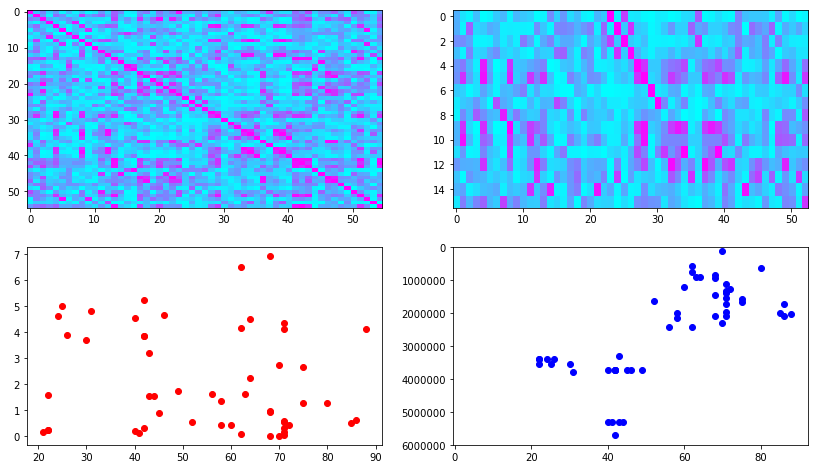

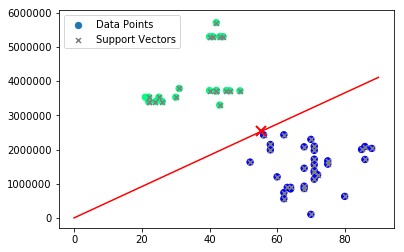

In [145]:
import matplotlib.pyplot as plt
ages = np.array([68.0, 71.0, 68.0, 75.0, 70.0, 88.0, 60.0, 86.0, 71.0, 62.0, 70.0, 75.0, 62.0, 85.0, 68.0, 68.0, 71.0, 58.0, 62.0, 71.0, 71.0, 63.0, 64.0, 64.0, 80.0, 71.0, 72.0, 58.0, 56.0, 71.0, 52.0, 42.0, 42.0, 22.0, 44.0, 22.0, 42.0, 42.0, 22.0, 43.0, 21.0, 45.0, 46.0, 24.0, 41.0, 25.0, 40.0, 49.0, 26.0, 40.0, 30.0, 31.0, 43.0] )
print(ages.shape)
print(result['svm']['alphas'].shape)
print(result['svm']['support_vectors'].shape)

#Subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
#Kernel Matrix Plots
img = ax[0][0].imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='cool', aspect='auto')
img1 = ax[0][1].imshow(np.asmatrix(result['kernel_matrix_testing']),interpolation='nearest',origin='upper',cmap='cool', aspect='auto')
#Age vs QSVM Alphas - how different points play into the SVM in terms of their weightage
ax[1][0].plot(ages,result['svm']['alphas'],'ro')
#The support vector plots
#ax[1][1].plot(result['svm']['support_vectors'],'g^')
ax[1][1].imshow(result['svm']['support_vectors'],cmap='hot', aspect='auto')
ax[1][1].plot(np.array(result['svm']['support_vectors'][:,0]),np.array(result['svm']['support_vectors'][:,1]),'bo',label = 'Xsaved')
plt.show()

#Another Subplot
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
#Calculate slope
m = y_mean/(x_mean-result['svm']['bias'][0])
#m = 2500000.0/(48-result['svm']['bias'][0])
#The last point with x=90
y = m*90
#Points for the line dividing the classes
xs = [result['svm']['bias'][0],x_mean,90]
ys = [0,y_mean,y]
#Plot the training set
ax1.scatter(trainingDataPoints[:, 0], trainingDataPoints[:, 1], c=trainingLabels, s=40, cmap='winter', label='Data Points')
#Plot the support vectors
ax1.scatter(np.array(result['svm']['support_vectors'][:,0]),np.array(result['svm']['support_vectors'][:,1]), s=25, c='grey', marker="x", label='Support Vectors')
#Plot the mean point
ax1.plot([x_mean], [y_mean], 'x', color='red', markeredgewidth=2, markersize=10)
#Plot the class-dividing line
ax1.plot(xs, ys, color='red')
plt.legend(loc='upper left');
plt.show()
#plt.scatter(trainingDataPoints[:, 0], trainingDataPoints[:, 1], c=trainingLabels, s=30, cmap='winter')
#plt.plot([48], [2500000], 'x', color='red', markeredgewidth=2, markersize=10)

In [146]:
#Differet way to use qsvm - using test and predict separately
trainingLabels = np.array(trainingLabels)
print(trainingDataPoints.shape)
print(trainingLabels.shape)
print(trainingLabels)

#qsvm.train(trainingDataPoints,trainingLabels,quantum_instance)
#qsvm.train(training_data,labels,quantum_instance)

#We will see the classical SVM parallely
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(trainingDataPoints, trainingLabels)

(55, 2)
(55,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [147]:
testDataPoints = np.array([[40.0, 2888139.0],
  [68.0, 927650.0],
  [71.0, 1133323.0],
  [68.0, 859230.0],
  [75.0, 1668323.0],
  [70.0, 104659.0],
  [88.0, 2032140.0],
  [60.0, 1200924.0], 
  [42.0, 2709112.1825882355],
  [42.0, 3724968.1825882364],
  [42.0, 3716432.1825882364],
  [22.0, 3402745.286117647],
  [44.0, 5300792.572235294],
  [22.0, 3530238.286117647],
  [45.0, 3785055.2670588233],
  [43.0, 3300664.877411765]])

testLabels = np.array([1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])

#Test the prediction accuracy 
#of QSVM
result1 = qsvm.test(testDataPoints,testLabels,quantum_instance)
print (result1)

#of Classical SVM
from sklearn.model_selection import cross_val_score
cross_val_score(model, testDataPoints, testLabels, scoring='recall_macro',cv=5)  

0.5


array([1., 1., 1., 1., 1.])

In [148]:
new_test_data = np.array([[40.0, 2888139.0],
  [68.0, 927650.0],
  [71.0, 1133323.0],
  [68.0, 859230.0],
  [75.0, 1668323.0],
  [70.0, 104659.0],
  [88.0, 2032140.0],
  [60.0, 1200924.0], 
  [42.0, 2709112.1825882355],
  [42.0, 3724968.1825882364],
  [42.0, 3716432.1825882364],
  [22.0, 3402745.286117647],
  [44.0, 5300792.572235294],
  [22.0, 3530238.286117647],
  [45.0, 3785055.2670588233],
  [43.0, 3300664.877411765]])
print(new_test_data.shape)
#Predict classes
#by a QSVM
predictions = qsvm.predict(new_test_data,quantum_instance)
print(predictions)
#by a classical SVM
predictions = model.predict(new_test_data)
print(predictions)


(16, 2)
[0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0]
[1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
